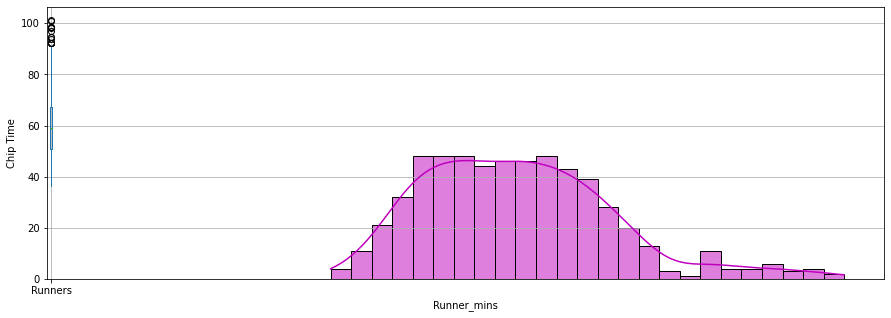

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

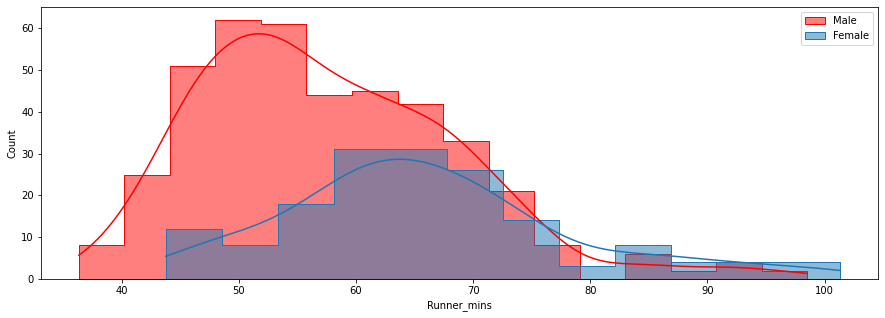

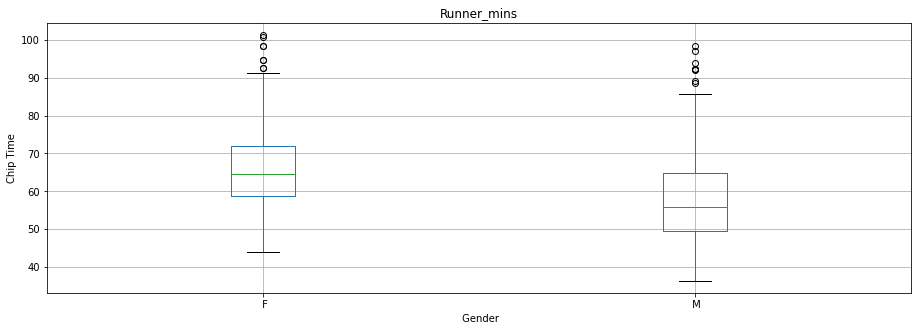

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from urllib.request import urlopen
from bs4 import BeautifulSoup
from pylab import rcParams

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)


# Get the title
title = soup.title
#print(title)


# Print out the text
text = soup.get_text()
#print(soup.text)

# extra useful html tags that include 'a'
tags = soup.find_all('a')
#print(tags)

# print only hyperlinks
all_links = soup.find_all("a")
#for link in all_links:
#print(link.get("href"))


# print table rows only
rows = soup.find_all('tr')
#print(rows[:10])

# get all of the table's rows in list form
for row in rows:
    row_td = row.find_all('td')
#print(row_td)
type(row_td)


# print the cells data without html tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
#print(cleantext)


# extracting the cell data with regex
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '', str_cells))
    list_rows.append(clean2)
#print(clean2)
type(clean2)

# Pandas tool for manipulating data into tables and formatting
df = pd.DataFrame(list_rows)
df.head(10)

df1 = df[0].str.split(',', expand=True)
df1.head(10)

df1[0] = df1[0].str.strip('[')
df1.head(10)


# find table headers using html th delimiter
col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
#print(all_header)

# new pandas dataframe
df2 = pd.DataFrame(all_header)
df2.head()

# split data into columns at the ',' positions
df3 = df2[0].str.split(',', expand=True)
df3.head()

# now concatenate the headers and the data from before
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head(10)

# now reconfigure the first row values to be the new header
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

# overview of the data: the table has 583 rows and 8 columns
#df5.info()
df5.shape

#  drop all rows with missing values
df6 = df5.dropna(axis=0, how='any')
#df6.info()
df6.shape

# drop redundant row
df7 = df6.drop(df6.index[0])
df7.head()

df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

# clean up brackets and \n
df7['Team'] = df7['Team'].str.strip(']')
df7 = df7.replace(r'\s+|\\n', ' ', regex=True) 
df7.head()

# convert column to a list
time_list = df7[' Chip Time'].tolist()

# convert Chip Time to minutes
time_mins = []
for i in time_list:
    if len(i.split(':')) > 2:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
        time_mins.append(math)
    else:
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
        time_mins.append(math)
#print(time_mins)

# add new column Runner_mins
df7['Runner_mins'] = time_mins
df7.head()

# handy describe method from pandas
df7.describe(include=[np.number])

# boxplot using matlibplot
rcParams['figure.figsize'] = 15, 5
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

# distribution model
x = df7['Runner_mins']
ax = sns.histplot(x, kde=True, color='m', bins=25)
plt.show()

# separate distribution times for males/females
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.histplot(data=m_fuko, color='red', kde=True, label='Male', element='step')
sns.histplot(data=f_fuko, kde=True, label='Female', element='step')
plt.legend()

# stats in numbers
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

# side-by-side boxplots for both males and females
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

